# Import all packages

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural net moduel
from keras.models import Sequential # create a linear stack of neural network layers.
from keras.layers import Dense, Dropout # is a module that provides various layer types, including Dense and Dropout, used to define the architecture of the neural network.
from keras.callbacks import EarlyStopping # callback is used to monitor the validation loss during training. If the validation loss stops

In [4]:
df= pd.read_csv('housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Preprocessing

In [6]:
df.shape

(20640, 10)

In [7]:
df.info() # here ocean_proxmity has object type so we have to convert it to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
# drop rows with missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df['total_bedrooms'].fillna(0,inplace=True)

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
#map 
df['ocean_proximity']= df['ocean_proximity'].map({'<1H OCEAN':0,'INLAND':1,'NEAR OCEAN':2,'NEAR BAY':3,'ISLAND':4})

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


## Train Test split

In [16]:
# Target variable is 'median_house_value'
y = df['median_house_value']
x = df.drop('median_house_value', axis=1)

In [17]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [18]:
# convert to numpy array
x = np.array(x)
y = np.array(y)

In [19]:
x

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  3.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  1.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  1.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  1.0000e+00]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
#here we can see tha the test_size is 0.2 this means that the test size is 20% and train size is 80% we are training 80% of data and testing the rest

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 9)
(4128, 9)
(16512,)
(4128,)


## Scaling
It is used beacuse beause it allows all feature to have a equal importance thats why we used min_max_scalar

In [22]:
# using min max scalar
min_max_scalar= MinMaxScaler()

In [23]:
x_train= min_max_scalar.fit_transform(x_train)

In [24]:
x_test= min_max_scalar.transform(x_test)

In [25]:
print(x_train)
print(x_test)

[[0.20119522 0.62061637 0.52941176 ... 0.0268048  0.2806513  0.25      ]
 [0.57270916 0.18278427 0.33333333 ... 0.16987338 0.35442959 0.        ]
 [0.61155378 0.16259299 0.90196078 ... 0.06084526 0.08477814 0.        ]
 ...
 [0.25796813 0.50903294 0.07843137 ... 0.11445486 0.3538365  0.        ]
 [0.19023904 0.55685441 0.84313725 ... 0.05344516 0.23276231 0.75      ]
 [0.5249004  0.39001063 0.37254902 ... 0.05706298 0.13901188 0.25      ]]
[[0.17031873 0.60573858 0.76470588 ... 0.06528531 0.22701756 0.        ]
 [0.52788845 0.37725824 0.15686275 ... 0.09324124 0.24287941 0.25      ]
 [0.73406375 0.03294368 0.21568627 ... 0.10935701 0.24746555 0.        ]
 ...
 [0.30577689 0.5706695  0.58823529 ... 0.02532478 0.08207473 0.25      ]
 [0.60557769 0.17109458 0.41176471 ... 0.09209012 0.14986    0.        ]
 [0.2250996  0.51540914 0.68627451 ... 0.03354711 0.34748486 0.75      ]]


In [26]:
x_train.shape[1]


9

# Building model (ANN)


In [27]:
model = Sequential([
    #input layer
    Dense(1000, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.2),
    #two hidden layers
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(250, activation='relu'),
    #output layer
    Dense(1,activation='linear') # here 1 shows countinuous value(regression) 
])
model.summary()

C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)              │     10,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 1000)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 500)               │    500,500 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 500)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 250)               │    125,250 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 1)                 │        251 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

Total Parameters: The "Total params" section indicates that the model has a total of 636,001 parameters. These are the weights and biases that the model will learn during training.   

Trainable Parameters: The "Trainable params" section shows that all 636,001 parameters in the model are trainable, meaning they will be updated and adjusted during training to optimize the model's performance.   

Non-trainable Parameters: The "Non-trainable params" section is typically 0, which means there are no parameters that won't be updated during training.

In [28]:
# Compile the model and set easlystoping
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss',mode='min',patience=50, restore_best_weights=True)

In [29]:
# fit the model (training)
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), callbacks=[es], epochs=10, batch_size=50, verbose=1)

Epoch 1/10


331/331 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 38373478400.0000 - mae: 158131.1875 - val_loss: 10740591616.0000 - val_mae: 84519.1016
Epoch 2/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9809125376.0000 - mae: 78662.5469 - val_loss: 6817411072.0000 - val_mae: 62780.5664
Epoch 3/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6325622272.0000 - mae: 60456.3086 - val_loss: 5835384832.0000 - val_mae: 54925.1211
Epoch 4/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5848131584.0000 - mae: 56637.8008 - val_loss: 5675040768.0000 - val_mae: 53617.7891
Epoch 5/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5518069248.0000 - mae: 54568.8242 - val_loss: 5431817728.0000 - val_mae: 55028.6797
Epoch 6/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5557437440.0000 - mae: 54612.3203 - val_loss: 5171217408.0000 - val_mae: 51940.8984
Epoch 7/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5307359232.0000 - mae: 53027.7305 - val_loss: 5126366208.0000 - val_mae: 53322.6992


# Metrics and Score


In [30]:

y_pred = model.predict(x_test)
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
# print("mae :", mean_squared_log_error(y_test,y_pred))
print("score :", r2_score(y_test,y_pred))

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
mae : 47600.35446607044
mse : 4579699335.027256
score : 0.6556135803447716


In [31]:
history.history

{'loss': [23561484288.0,
  8901914624.0,
  6183987200.0,
  5824157184.0,
  5667955712.0,
  5430028800.0,
  5264414720.0,
  5102114816.0,
  4954291200.0,
  4819708928.0],
 'mae': [117659.75,
  74571.3671875,
  58939.62109375,
  56076.41796875,
  54954.66015625,
  53708.07421875,
  52534.01171875,
  51523.48046875,
  50622.18359375,
  49612.60546875],
 'val_loss': [10740591616.0,
  6817411072.0,
  5835384832.0,
  5675040768.0,
  5431817728.0,
  5171217408.0,
  5126366208.0,
  4842585600.0,
  4735747072.0,
  4575110656.0],
 'val_mae': [84519.1015625,
  62780.56640625,
  54925.12109375,
  53617.7890625,
  55028.6796875,
  51940.8984375,
  53322.69921875,
  49444.0078125,
  47827.0546875,
  47607.80859375]}

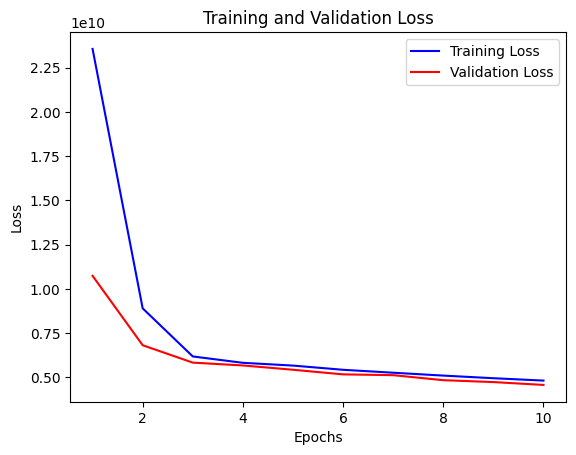

In [32]:
# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)
# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


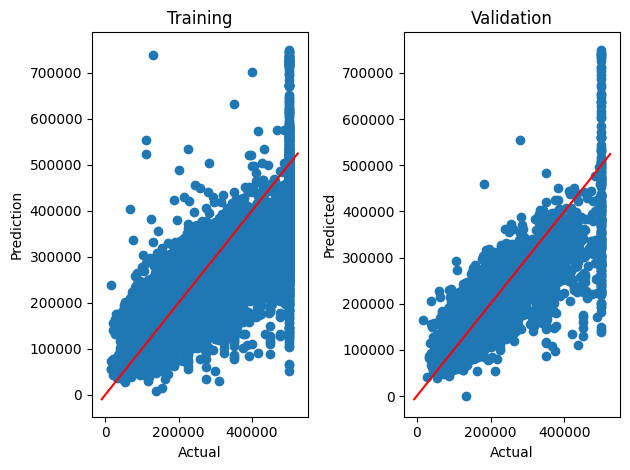

In [33]:
# Specify the dimensions 
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Predicted', fontsize=10)
axes[1].set_title('Validation')

# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()
plt.show()

# Predictive System

In [34]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    features = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    features_scaled = min_max_scalar.fit_transform([features])
    results = model.predict(features_scaled).reshape(1,-1)
    return results[0]


In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
longitude = -122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 880.0000
total_bedrooms   =  129.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [37]:
price #  452600.0000 # actual value

array([282382.56], dtype=float32)

# Save model

In [38]:
model.save("model_ann.h5")

import pickle
pickle.dump(min_max_scalar,open('scaler.pkl','wb'))

# Check version and install the same in vscode (in production)


In [39]:
import sklearn
import tensorflow as tf
import keras

print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

scikit-learn version: 1.3.2
TensorFlow version: 2.15.0
Keras version: 3.0.4
